In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('../data/abalone_data.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
df['Ages'] = df.Rings + 1.5

In [28]:
df.head()

,Sex,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings,Ages
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [7]:
df.shape

(4177, 9)

### Throw the height outlier

In [29]:
df2 = df[df.Height < 0.4]

In [30]:
df2.shape

(4175, 10)

In [146]:
float_columns = [x for x in df2.columns if x not in ['Sex', 'Rings', 'Ages', 'Is_baby']]

In [147]:
float_target_col = [x for x in df2.columns if x not in ['Sex', 'Rings', 'Is_baby']]

In [148]:
print(float_target_col)

['Length', 'Diameter', 'Height', 'Whole_height', 'Shucked_height', 'Viscera_height', 'Shell_weight', 'Ages']


### Check skewness

In [149]:
skew_columns = (df2[float_columns].skew().sort_values(ascending=False))
skew_columns2 = skew_columns.loc[skew_columns > 0.75]
skew_columns

Shucked_height    0.715003
Shell_weight      0.620924
Viscera_height    0.589856
Whole_height      0.528732
Height           -0.264536
Diameter         -0.609823
Length           -0.640423
dtype: float64

### free from bad skew

### Check for correlation with target

In [50]:
df2.head()

,Sex,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings,Ages,Is_baby
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1


In [48]:
df2.Sex.value_counts()

M    1527
I    1342
F    1306
Name: Sex, dtype: int64

In [49]:
df2['Is_baby'] = df2.Sex.apply(lambda x: 1 if x == 'I' else 0)

C:\Users\Asus\AppData\Local\Temp/ipykernel_17084/202328738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Is_baby'] = df2.Sex.apply(lambda x: 1 if x == 'I' else 0)


In [51]:
exclude_column = [x for x in df2.columns if x not in ['Sex', 'Rings', ]]

In [52]:
df3 = df2[exclude_column]

In [53]:
df3.head()

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Ages,Is_baby
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1


<AxesSubplot:>

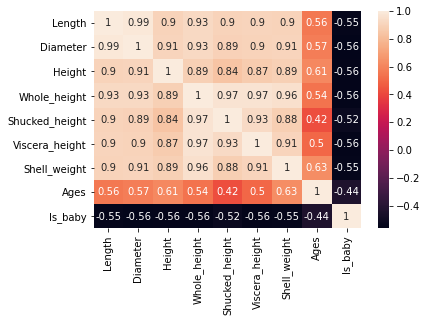

In [54]:
sns.heatmap(data=df3.corr(),annot=True)

### Correlation maps

In [16]:
# correlation matrix : 
corr_mat = df2[float_columns].corr()
# Strip out the diagnoal values for next step:
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat 

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight
Length,0.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648
Diameter,0.986804,0.000000,0.906086,0.925537,0.893385,0.899768,0.905271
Height,0.899834,0.906086,0.000000,0.887712,0.836400,0.865710,0.888980
Whole_height,0.925372,0.925537,0.887712,0.000000,0.969386,0.966311,0.955385
Shucked_height,0.898184,0.893385,0.836400,0.969386,0.000000,0.931868,0.882681
Viscera_height,0.903091,0.899768,0.865710,0.966311,0.931868,0.000000,0.907603
Shell_weight,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,0.000000


<AxesSubplot:>

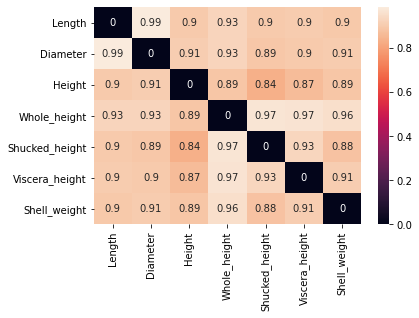

In [17]:
sns.heatmap(data=corr_mat,annot=True)

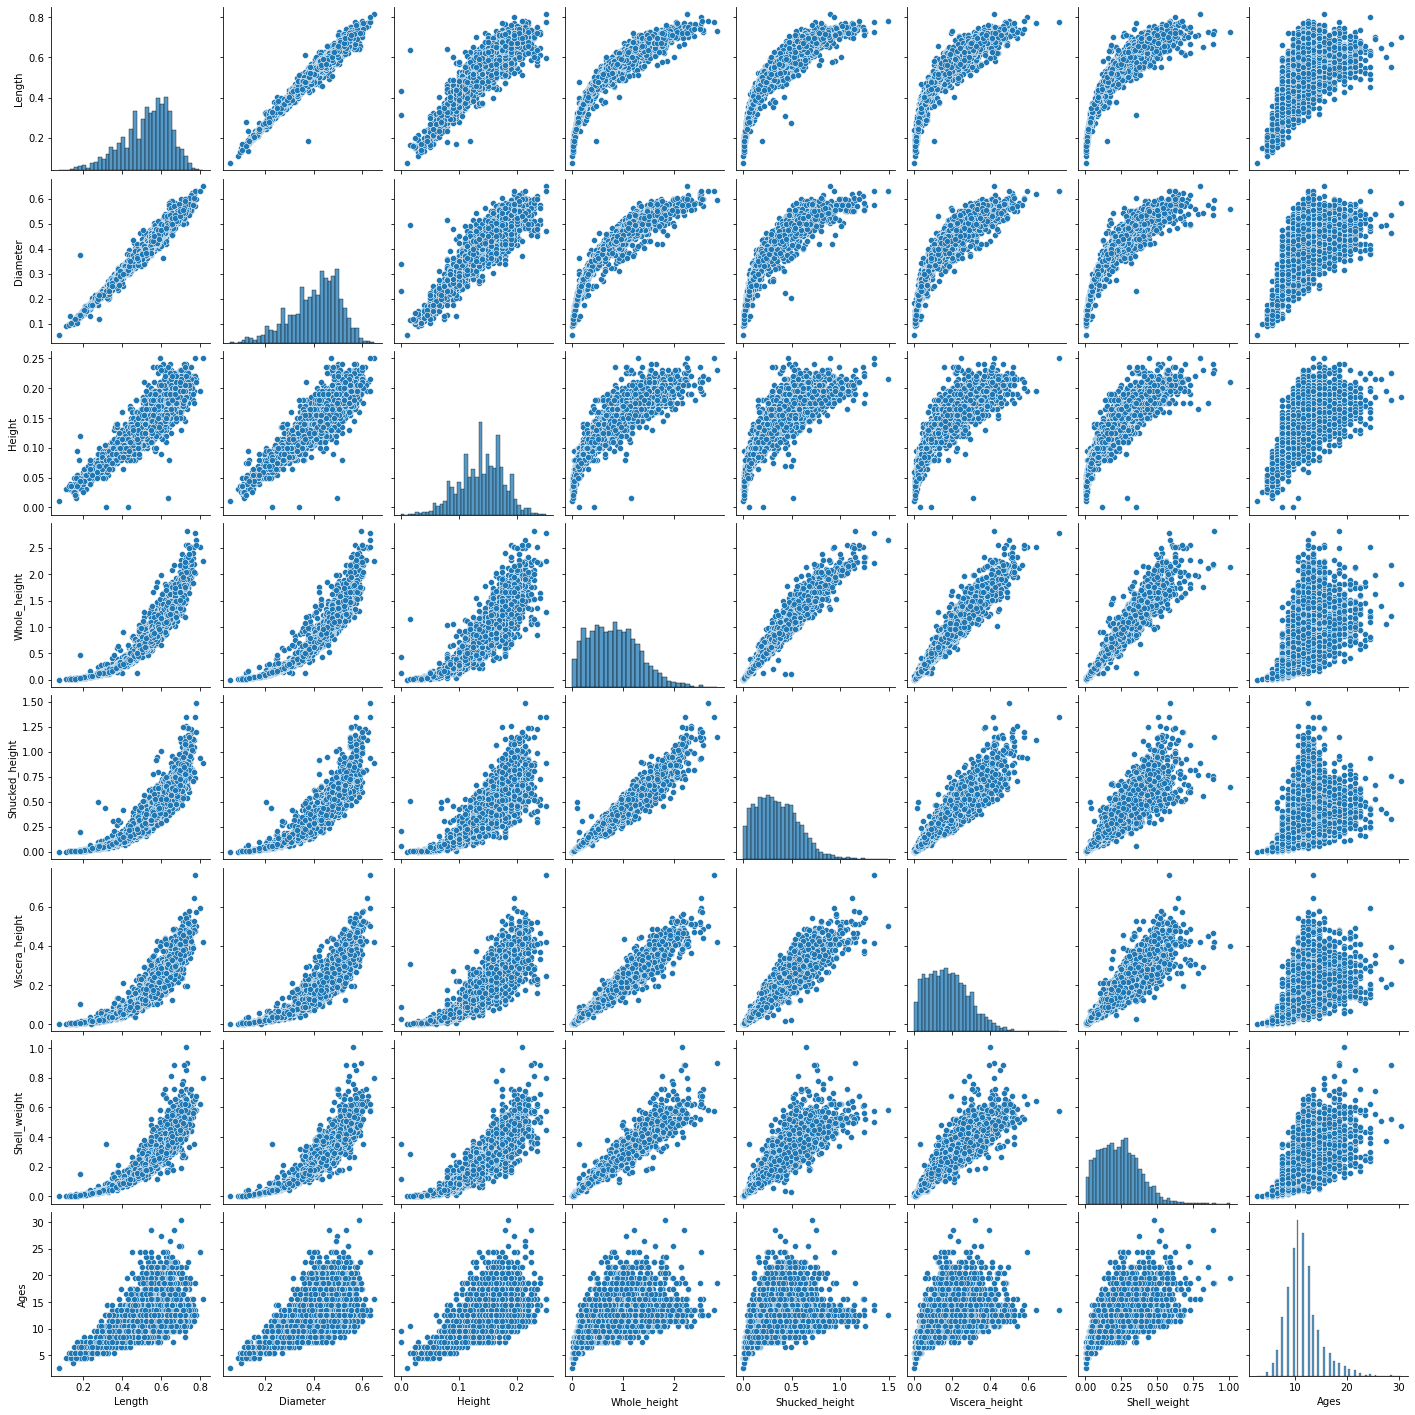

In [150]:
sns.pairplot(df2[float_target_col])

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

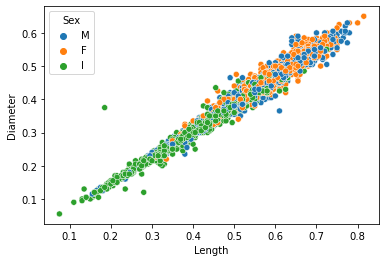

In [24]:
sns.scatterplot(data=df2, x='Length', y='Diameter', hue='Sex')

## Will try regular Linear Regression with all float feature

In [34]:
df_x = df2[float_columns]

In [35]:
df_y = df2[['Ages']]

<AxesSubplot:xlabel='Ages', ylabel='Count'>

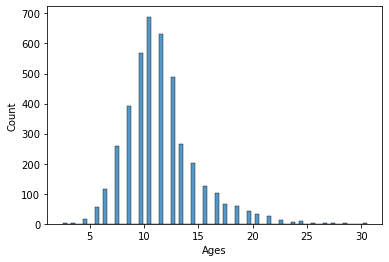

In [159]:
sns.histplot(data=df2.Ages)

<AxesSubplot:>

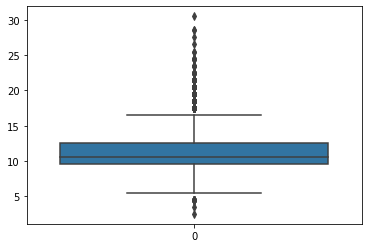

In [161]:
sns.boxplot(data=df2.Ages)

### Split data

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

In [121]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3131, 7) (1044, 7) (3131, 1) (1044, 1)


In [122]:
train_x.head()

,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight
2667,0.585,0.450,0.150,0.9380,0.4670,0.2030,0.2250
4086,0.590,0.450,0.155,0.8740,0.3690,0.2135,0.2400
2552,0.310,0.225,0.075,0.1550,0.0650,0.0370,0.0365
1804,0.620,0.470,0.145,1.0865,0.5110,0.2715,0.2565
247,0.360,0.275,0.085,0.1975,0.0745,0.0415,0.0700


## Normalize data

In [123]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [124]:
train_x_scl = scl.fit_transform(train_x)

In [125]:
train_x_scl.shape

(3131, 7)

In [126]:
test_x_scl = scl.transform(test_x)

In [127]:
test_x_scl.shape

(1044, 7)

### Make model

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lin_reg = LinearRegression()

In [130]:
lin_reg.fit(train_x_scl, train_y)

LinearRegression()

### Evaluation

In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
def evaluation(model, model_name):
    train_pred = model.predict(train_x_scl)
    test_pred = model.predict(test_x_scl)
    print(f'Model test MSE : {mean_squared_error(test_y, test_pred)}')
    train_rmse = mean_squared_error(train_y, train_pred, squared=False)
    test_rmse = mean_squared_error(test_y, test_pred, squared=False)
    
    print(f'Model: {model_name}')
    print(f'Train RMSE    : {train_rmse}')
    print(f'Test RMSE     : {test_rmse}')

In [133]:
evaluation(lin_reg, 'Linear Regression')

Model test MSE : 4.533273678749758
Model: Linear Regression
Train RMSE    : 2.2242872993501526
Test RMSE     : 2.129148580712431


### Ouww, I get worse RMSE with more feature

### Ridge regression

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [135]:
ridge = Ridge()

parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10, 20]}

In [136]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)
ridge_regressor.fit(train_x_scl, train_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_root_mean_squared_error')

In [137]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 0.01}
2.230361711381229


In [138]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(train_x_scl, train_y)

Ridge(alpha=0.01)

In [139]:
evaluation(ridge_reg, 'Ridge Reg with all features')

Model test MSE : 4.533278947936171
Model: Ridge Reg with all features
Train RMSE    : 2.2242873090092967
Test RMSE     : 2.12914981810491


### 25% test set give the best rmse

In [152]:
lin_reg_pred = lin_reg.predict(test_x_scl)

Text(0, 0.5, 'Predicted Ages')

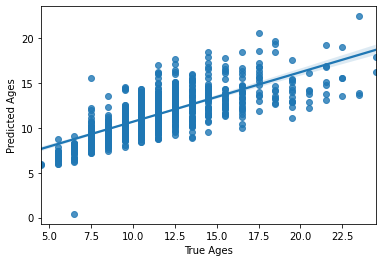

In [158]:
sns.regplot(x=test_y,y=lin_reg_pred)
plt.xlabel('True Ages')
plt.ylabel('Predicted Ages')

### Try with limited feature